# Importing the Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Loading the Dataset

You will get 4 arrays already Xtrain Xtest Ytrain Ytest already processed data

In [ ]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
#checking the data type
type(X_train)

numpy.ndarray

In [ ]:
#checking the training shape
X_train.shape

(60000, 28, 28)

In [ ]:
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
# printing the image
print(X_train[150])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  19 221 254
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 139 253 227
    8   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 254 253  63
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4 138 252 25

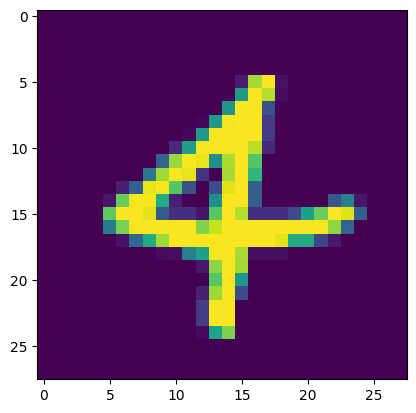

-------------------------------------------------------
4


In [ ]:
#displaying the image
plt.imshow(X_train[150])
plt.show()
#print the corresponding label
print('-------------------------------------------------------')
print(y_train[150])

In [ ]:
#checking unique values in training & testing data
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


#Preprocessing

Standardizing the data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# checking the normalized values
print(X_train[150])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#storing y_test
Y_test = y_test

In [ ]:
# one hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
print(y_train[150])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Model Training

In [ ]:
#setting the layers of Neural Network
#if rgb image the inputscahpe=28,28,3
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images
    #Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax') # Output layer for 10 classes
])

In [ ]:
#compiling the Neural Network
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#fitting the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2828 - accuracy: 0.9207 - val_loss: 0.1494 - val_accuracy: 0.9572
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1252 - accuracy: 0.9631 - val_loss: 0.1150 - val_accuracy: 0.9662
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0863 - accuracy: 0.9743 - val_loss: 0.0952 - val_accuracy: 0.9711
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9812 - val_loss: 0.0964 - val_accuracy: 0.9714
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0841 - val_accuracy: 0.9758


Training Data Accuracy : 97.58%

In [ ]:
# test data accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9758
Test accuracy: 0.9757999777793884


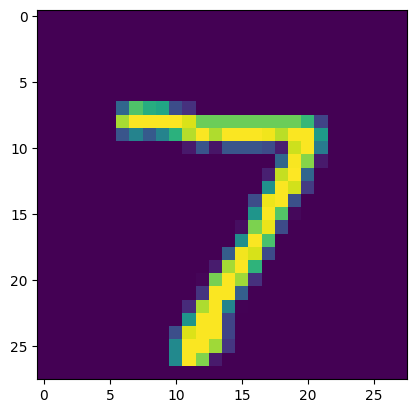

In [ ]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
#predicting the val
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(y_pred[0])

[3.9421153e-08 1.2957831e-08 2.8079674e-05 7.2098235e-05 1.7325384e-11
 4.7430491e-09 8.4474875e-12 9.9989921e-01 1.2179218e-07 3.2264535e-07]


In [ ]:
#converting the prediction prob to class label of one data
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [ ]:
#converting the prediction prob to class label for all
#data points
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True Labels

Y_pred_labels --> Predicted Labels

#Model Evaluation

Confusion Matrix

In [ ]:
#importing confusion matrix for multiple labels
from tensorflow.math import confusion_matrix

In [ ]:
#confusion matrix for predicted and actual data
conf_mat = confusion_matrix(Y_test, y_pred_labels)

In [ ]:
#importing sns
import seaborn as sns

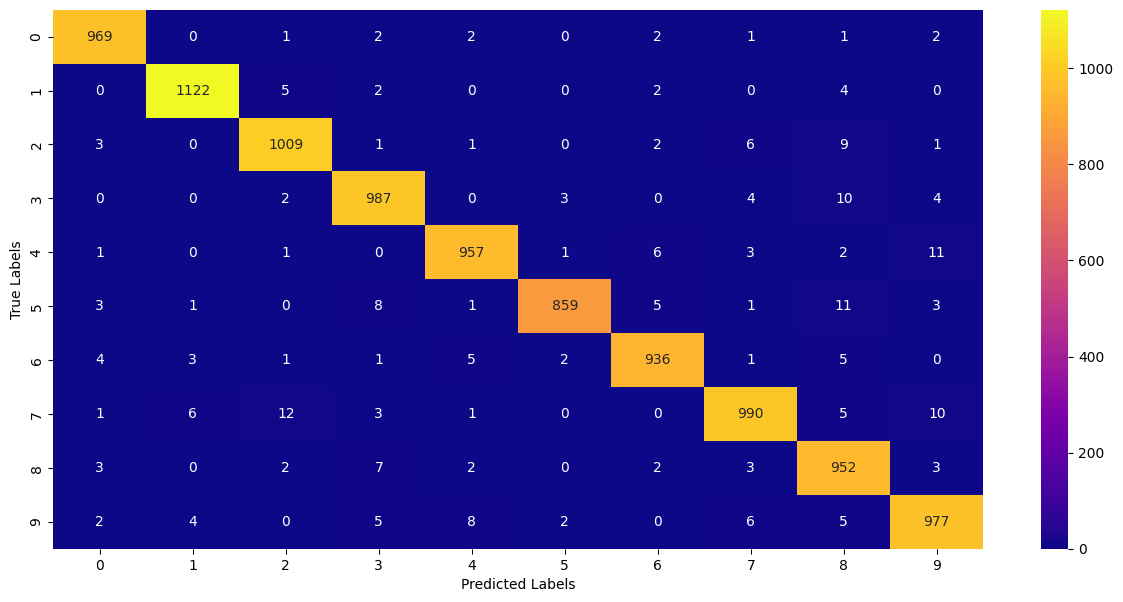

In [ ]:
#plotting the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='plasma')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

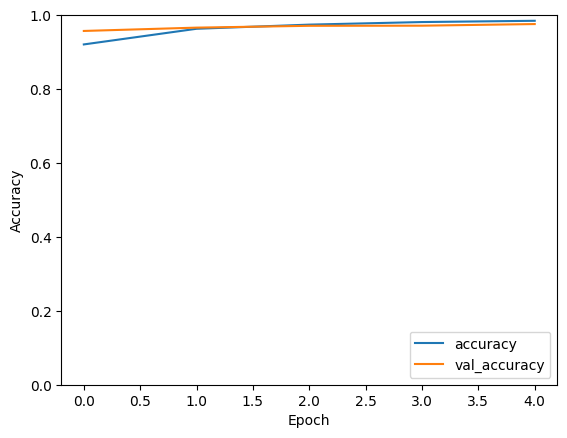

In [ ]:
#plotting the accuracy and validation accuracy wrt epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

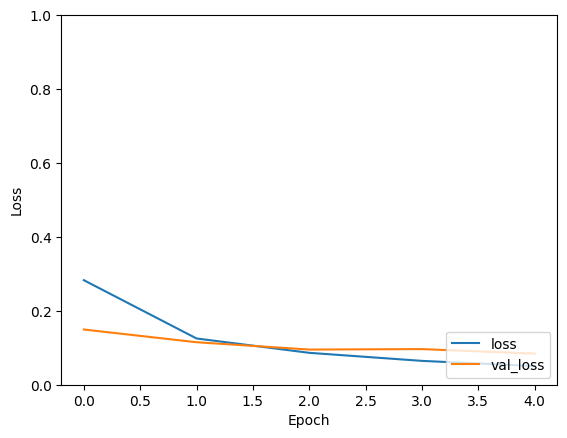

In [ ]:
#plotting the loss and validation loss wrt epochs
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#Predictive System

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

Path of the image to be predicted: /content/images (3).jpeg


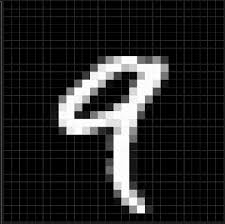

[[35 22 29 ... 27 46 28]
 [70 67 36 ...  4 23 28]
 [36 74 27 ...  0 16 28]
 ...
 [28 80 26 ... 18 28 28]
 [29 79 26 ... 25 34 28]
 [23 74 20 ... 25 33 28]]
[[ 14  13  14   6   7   8   3   1   2   5   0   1   1   2   1   2   5   2
    4   4   1   1   1   2   2   2   1   3]
 [ 16  17  19   6   7  10   3   3   3   6   1   2   3   1   3   1   8   3
    5   7   2   3   5   6   2   7   4   4]
 [ 18  16  15   7   6   8   4   1   4   6   1   0   1   3   1   4   6   3
    5   4   2   1   1   2   1   2   2   4]
 [ 13  15  21   7   8  11   5   2   5   4   1   4   1   3   2   4   4   4
    5   3   3   2   5   4   3   4   3   5]
 [ 13  15  21   7   8  11   5   2   5   4   1   4   1   3   2   4   3   4
    6   3   3   2   5   4   3   4   3   5]
 [ 15  18  17   6   7  10   2   0   1   0   0   1   0   0   0   0   7   1
    4   0   1   0   0   0   1   4   0   1]
 [ 17  13  18   6   6   7   2   1   2   2   0   2   0   2   1   4   8   0
    3   6   1   1   3   3   1   2   1   3]
 [ 16  18  17   7   7   8

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The Handwritten Digit is recognised as" , input_pred_label)

In [ ]:
# Save the model
model.save('mnist_digit_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<PIL.Image.Image image mode=L size=204x192 at 0x7A5C32A2F610>
<PIL.Image.Image image mode=L size=28x28 at 0x7A5C32A2F850>
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 254]
 [255 255 255 255 255 255 255 255 255 255 255 255 254 253 253 253 254 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 253 255 255 255 255 255 253
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 254 255 255 244 211 197 208 239 255
  255 254 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 254 255 249 162  97  96  99  96 100 162
  245 254 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 254 254 244 137 130 165 172 169 169 163 141
  183 253 254 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 254 253 142 142 187 166 164 169 167 175 182
  167 217 255 254 255 255 255 255 255 255]
 [255 255 255 255 255 255 253 255 207 144 205 192 187 220 2

<ipython-input-51-a37e9a5872bf>:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((28, 28), Image.ANTIALIAS)


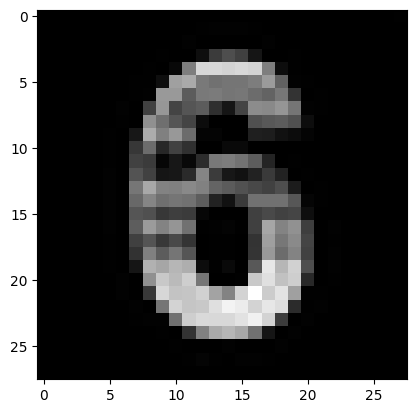

1/1 [==============================] - 0s 28ms/step
The Handwritten Digit is recognised as 5


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)

    # Convert to grayscale
    img = img.convert('L')

    # Resize to 28x28
    img = img.resize((28, 28), Image.ANTIALIAS)

    # Convert to numpy array
    img_array = np.array(img)

    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0

    # Invert colors (if necessary)
    img_array = 1 - img_array

    return img_array

# Example usage
image_path = '/content/download (6).jpeg'
processed_img = preprocess_image(image_path)

# Display the processed image
plt.imshow(processed_img, cmap='gray')
plt.show()

image_reshaped = np.reshape(processed_img, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The Handwritten Digit is recognised as" , input_pred_label)


Path of the image to be predicted: /content/images (2).png


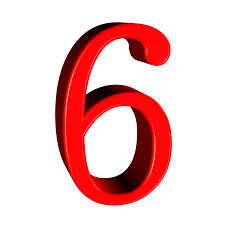

1/1 [==============================] - 0s 55ms/step
The Handwritten Digit is recognized as: 4


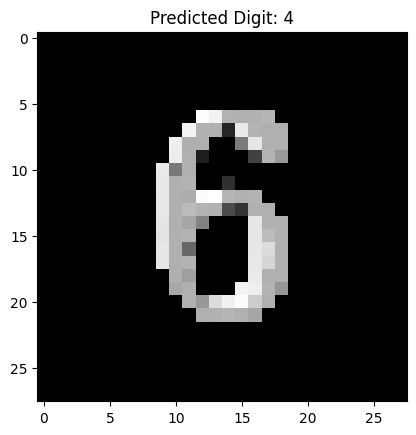

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Use cv2_imshow for Jupyter notebooks

def preprocess_image(image_path):
    # Read the input image
    input_image = cv2.imread(image_path)
    cv2_imshow(input_image)  # Display the input image

    # Convert to grayscale
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Resize the digit to 20x20
    digit_resized = cv2.resize(grayscale, (20, 20))

    # Place the digit in the center of a 28x28 canvas
    canvas = np.ones((28, 28), dtype=np.float32) * 255  # Initialize with white background
    x_offset = (28 - 20) // 2
    y_offset = (28 - 20) // 2
    canvas[y_offset:y_offset+20, x_offset:x_offset+20] = digit_resized

    # Normalize pixel values to [0, 1]
    canvas = canvas / 255.0

    # Invert colors if necessary
    canvas = 1 - canvas

    # Reshape for the model input
    image_reshaped = np.reshape(canvas, (1, 28, 28, 1))  # Add channel dimension

    return image_reshaped

# Path to your trained model (make sure the model is already trained and saved)
model_path = '/content/mnist_digit_classification_model.h5'
model = load_model(model_path)

# Input image path
input_image_path = input('Path of the image to be predicted: ')

# Preprocess the input image
preprocessed_image = preprocess_image(input_image_path)

# Predict the digit
input_prediction = model.predict(preprocessed_image)
input_pred_label = np.argmax(input_prediction)

# Output the predicted digit
print("The Handwritten Digit is recognized as:", input_pred_label)

# Optional: Display the preprocessed image
plt.imshow(preprocessed_image[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {input_pred_label}")
plt.show()


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path)

    # Convert to grayscale
    img = img.convert('L')

    # Resize to 28x28
    img = img.resize((28, 28), Image.ANTIALIAS)

    # Convert to numpy array
    img_array = np.array(img)

    # Normalize pixel values to [0, 1]
    img_array = img_array / 255.0

    # Invert colors (if necessary)
    img_array = 1 - img_array

    return img_array

# Example usage
image_path = '/content/download (6).jpeg'
processed_img = preprocess_image(image_path)

# Display the processed image
plt.imshow(processed_img, cmap='gray')
plt.show()



input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The Handwritten Digit is recognised as" , input_pred_label)



